In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df=pd.read_csv("Results_MADE.csv")
df.head()

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm),WQI
0,7.5,9.95,7.85,0.15,90.0,0.255,22.5,180.0,134.5,27.143963
1,11.0,9.65,7.70,0.45,205.0,0.200,62.5,410.0,77.0,15.780001
2,7.5,9.90,7.65,0.55,100.0,0.100,26.0,200.0,101.5,20.612438
3,8.5,9.65,7.55,0.35,300.0,0.250,97.5,600.0,148.0,29.820475
4,10.0,9.55,7.80,0.25,190.0,0.150,47.5,380.0,106.0,21.498569


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature                        295 non-null    float64
 1   Dissolved Oxygen                   295 non-null    float64
 2   pH                                 295 non-null    float64
 3   Bio-Chemical Oxygen Demand (mg/L)  295 non-null    float64
 4   Faecal Streptococci (MPN/ 100 mL)  295 non-null    float64
 5   Nitrate (mg/ L)                    295 non-null    float64
 6   Faecal Coliform (MPN/ 100 mL)      295 non-null    float64
 7   Total Coliform (MPN/ 100 mL)       295 non-null    float64
 8   Conductivity (mho/ Cm)             295 non-null    float64
 9   WQI                                295 non-null    float64
dtypes: float64(10)
memory usage: 23.2 KB


In [4]:
df.describe()

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm),WQI
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,20.903898,7.342034,7.754627,3.544136,7463.333729,0.870915,5983.661695,14926.667458,501.860678,100.889437
std,6.051566,1.910113,0.378879,9.043299,26272.135186,1.431247,22934.986514,52544.270371,798.311280,158.115301
min,0.000000,0.000000,5.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524595
25%,18.000000,6.850000,7.550000,0.725000,29.225000,0.155000,4.000000,58.450000,208.250000,42.010910
50%,22.500000,7.750000,7.750000,1.600000,240.000000,0.550000,79.500000,480.000000,299.500000,60.379172
75%,25.550000,8.600000,8.000000,3.100000,2650.000000,0.950000,2375.000000,5300.000000,438.250000,90.120883
max,30.500000,10.250000,8.600000,123.500000,229000.000000,14.050000,251000.000000,458000.000000,9272.000000,1834.549110


In [5]:
df.shape

(295, 10)

In [6]:
df.isnull().sum()

Temperature                          0
Dissolved Oxygen                     0
pH                                   0
Bio-Chemical Oxygen Demand (mg/L)    0
Faecal Streptococci (MPN/ 100 mL)    0
Nitrate (mg/ L)                      0
Faecal Coliform (MPN/ 100 mL)        0
Total Coliform (MPN/ 100 mL)         0
Conductivity (mho/ Cm)               0
WQI                                  0
dtype: int64

In [7]:
X=df.drop("WQI",axis=1)
Y=df['WQI']

In [8]:
Y

0        27.143963
1        15.780001
2        20.612438
3        29.820475
4        21.498569
          ...     
290      56.181191
291      54.711315
292      57.114775
293     311.545107
294    1834.549110
Name: WQI, Length: 295, dtype: float64

In [24]:
print(df.columns)

Index(['Temperature', 'Dissolved Oxygen', 'pH',
       'Bio-Chemical Oxygen Demand (mg/L)',
       'Faecal Streptococci (MPN/ 100 mL)', 'Nitrate (mg/ L)',
       'Faecal Coliform (MPN/ 100 mL)', 'Total Coliform (MPN/ 100 mL)',
       'Conductivity (mho/ Cm)', 'WQI'],
      dtype='object')


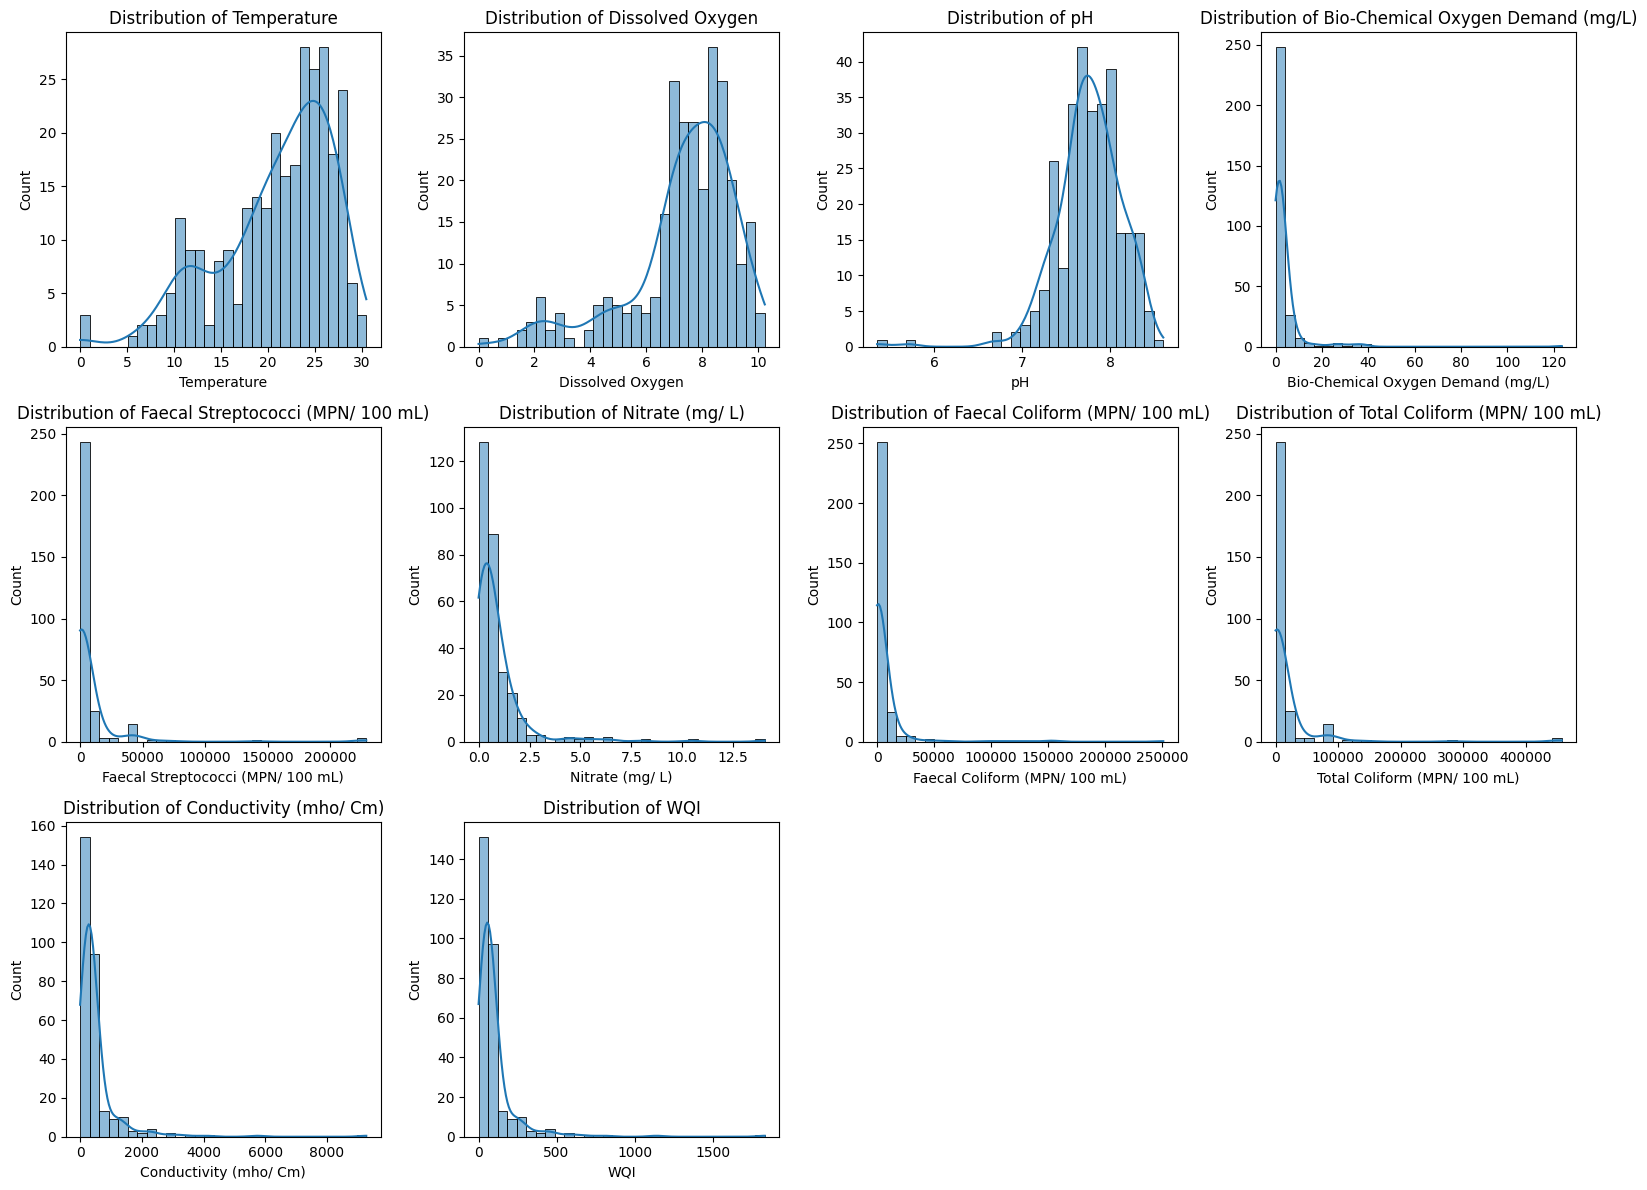

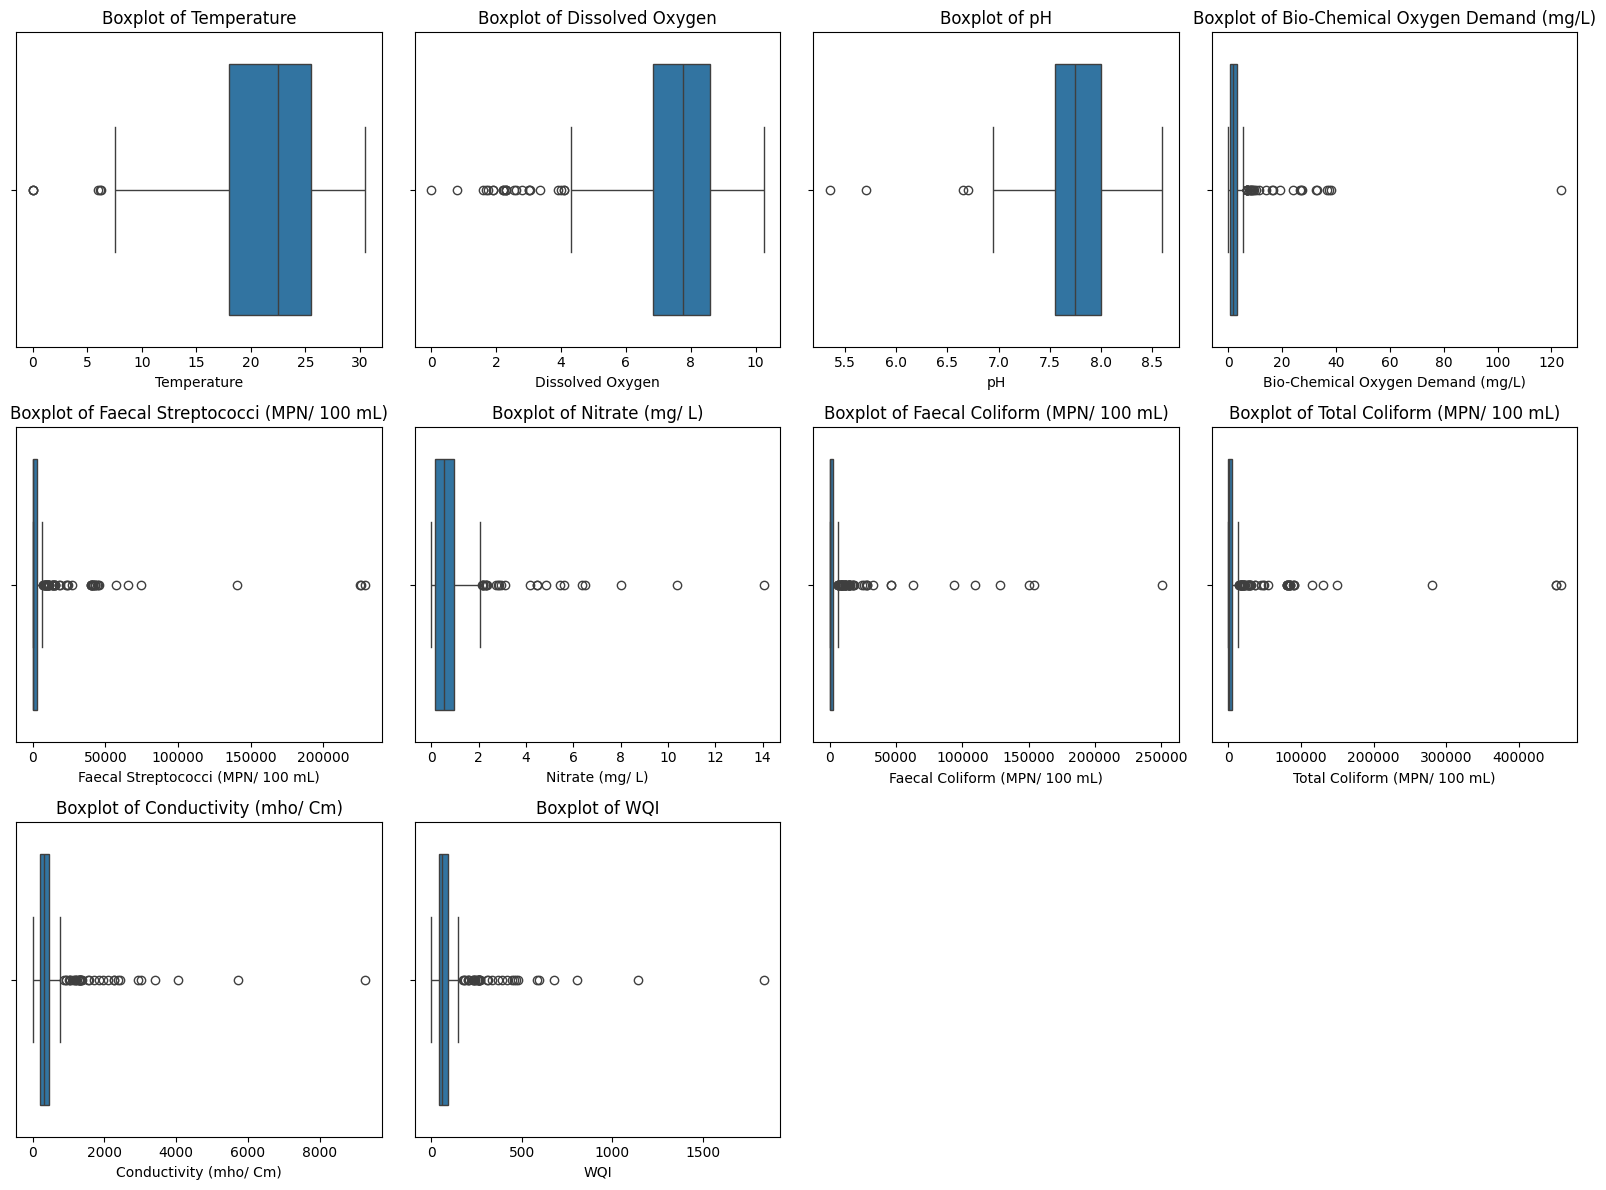

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)  # adjust rows/cols according to number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots for outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [10]:
skewed_cols = [
    'Bio-Chemical Oxygen Demand (mg/L)',
    'Faecal Streptococci (MPN/ 100 mL)',
    'Nitrate (mg/ L)',
    'Faecal Coliform (MPN/ 100 mL)',
    'Total Coliform (MPN/ 100 mL)',
    'Conductivity (mho/ Cm)',
    'WQI'
]

for col in skewed_cols:
    df[col] = np.log1p(df[col])


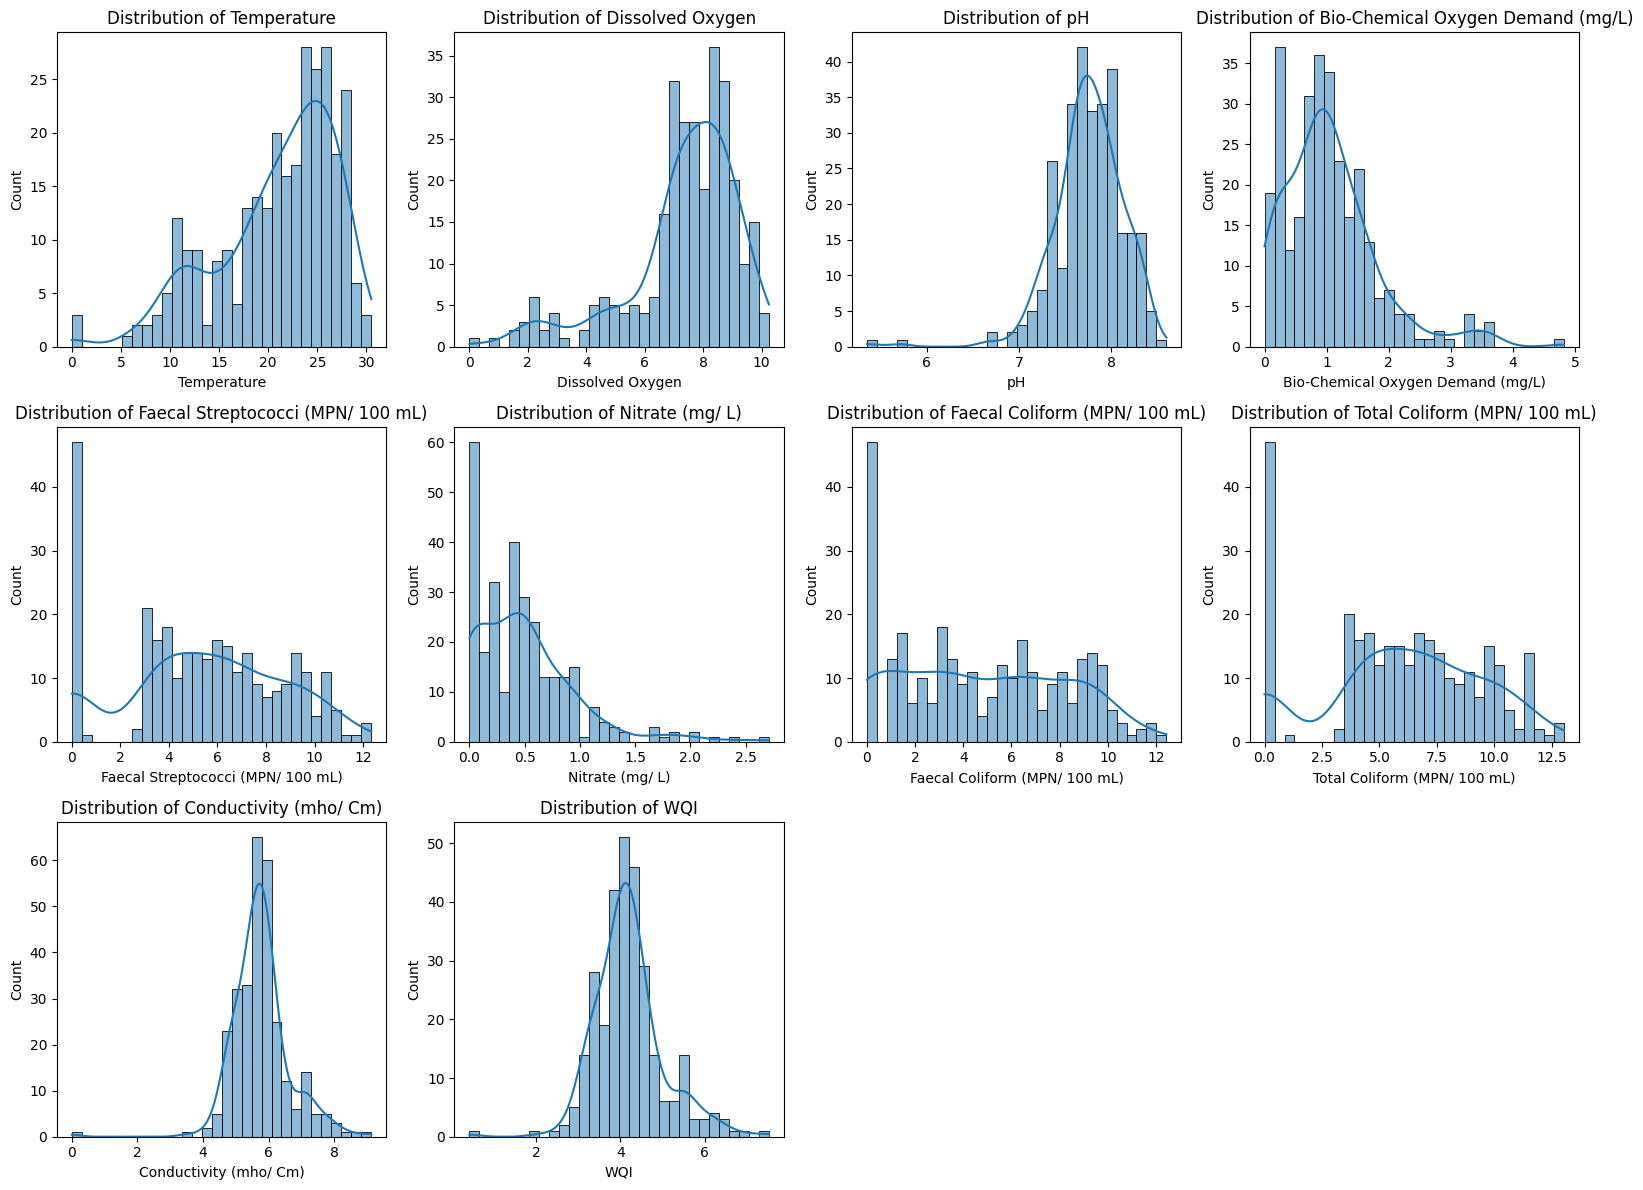

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)  # adjust rows/cols according to number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



In [12]:


# List of columns to apply IQR method
columns = [
    'Temperature',
    'Dissolved Oxygen',
    'pH',
    'Bio-Chemical Oxygen Demand (mg/L)',
    'Nitrate (mg/ L)',
    'Conductivity (mho/ Cm)',
    'WQI'
]

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR filtering to each selected column
for col in columns:
    df = remove_outliers_iqr(df, col)
 

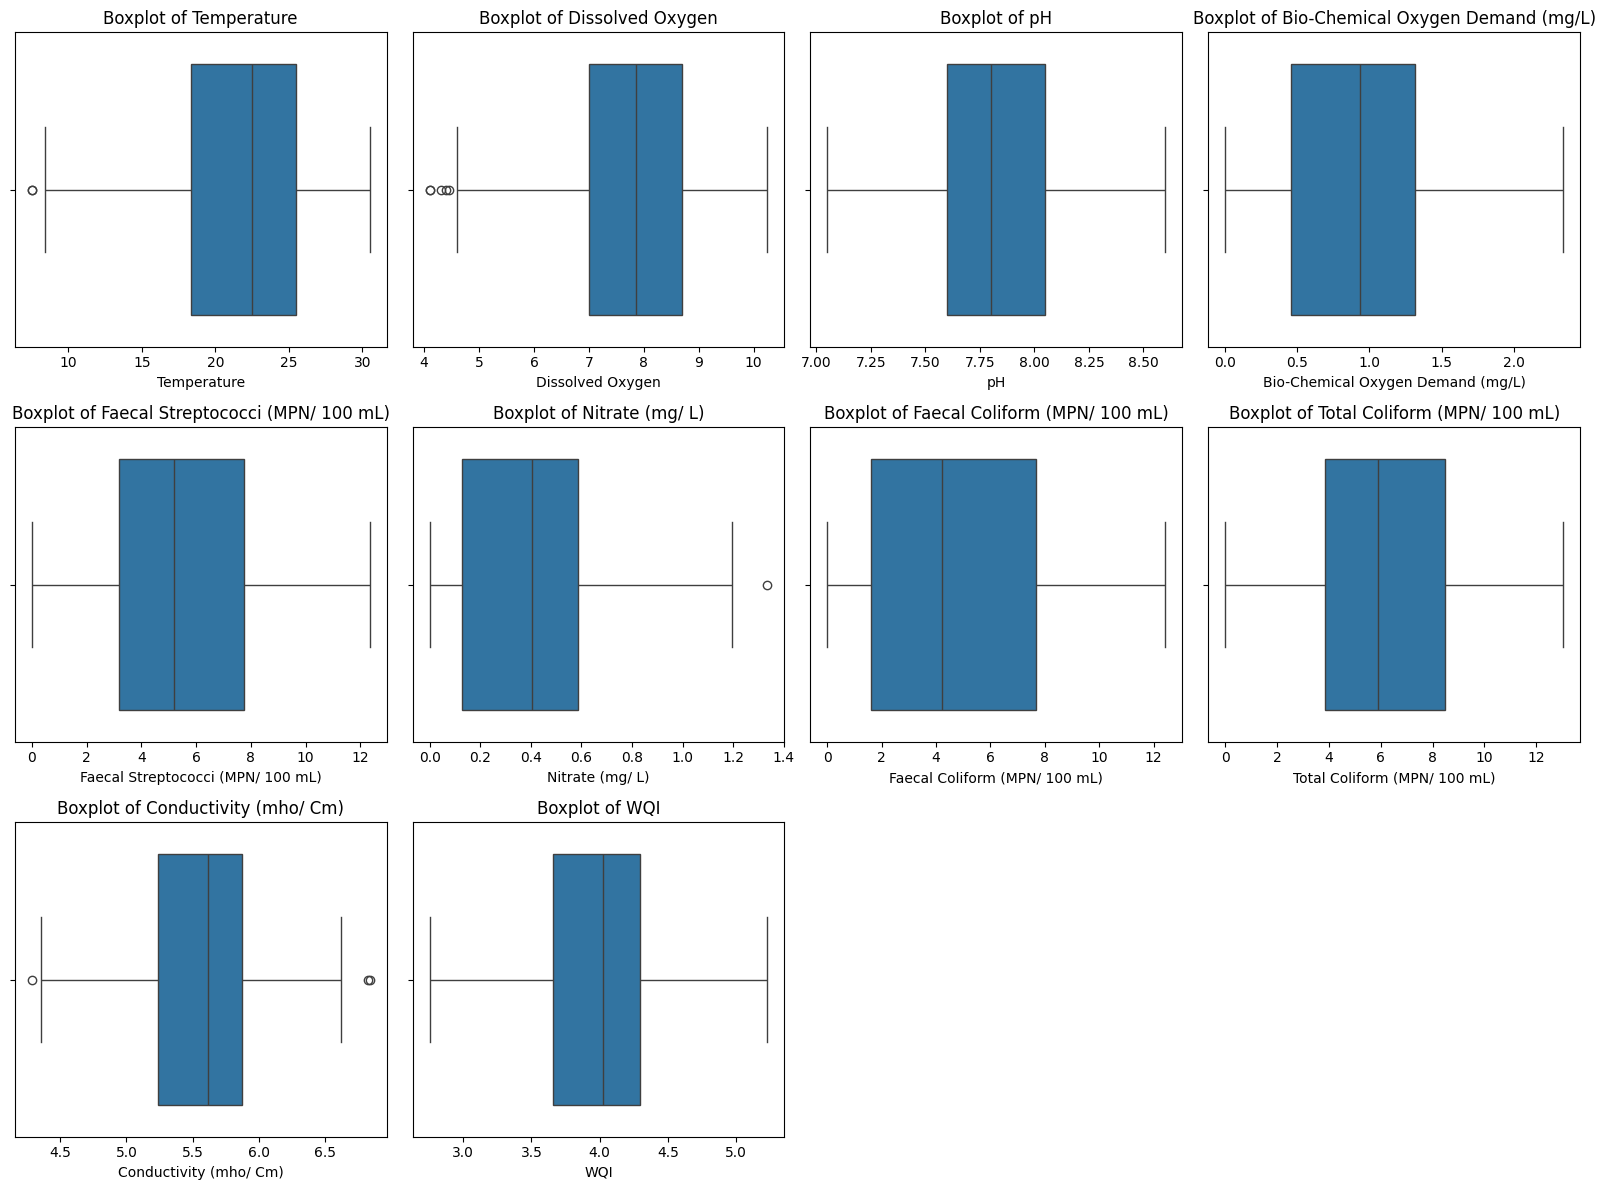

In [13]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplots for outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Corelation


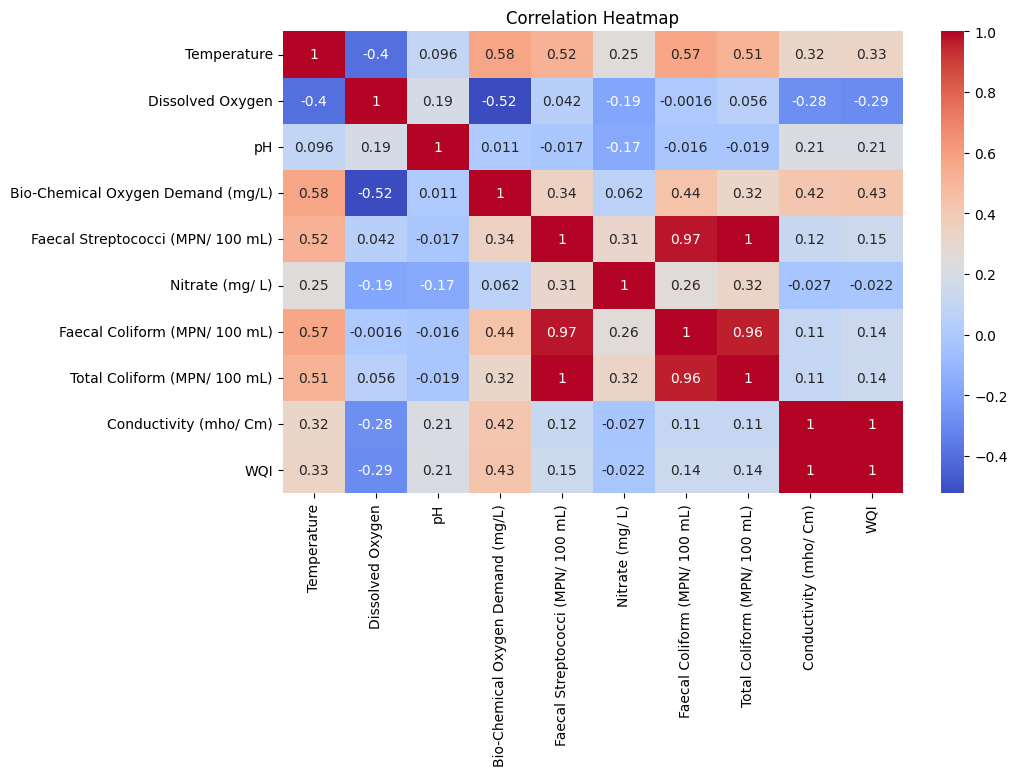

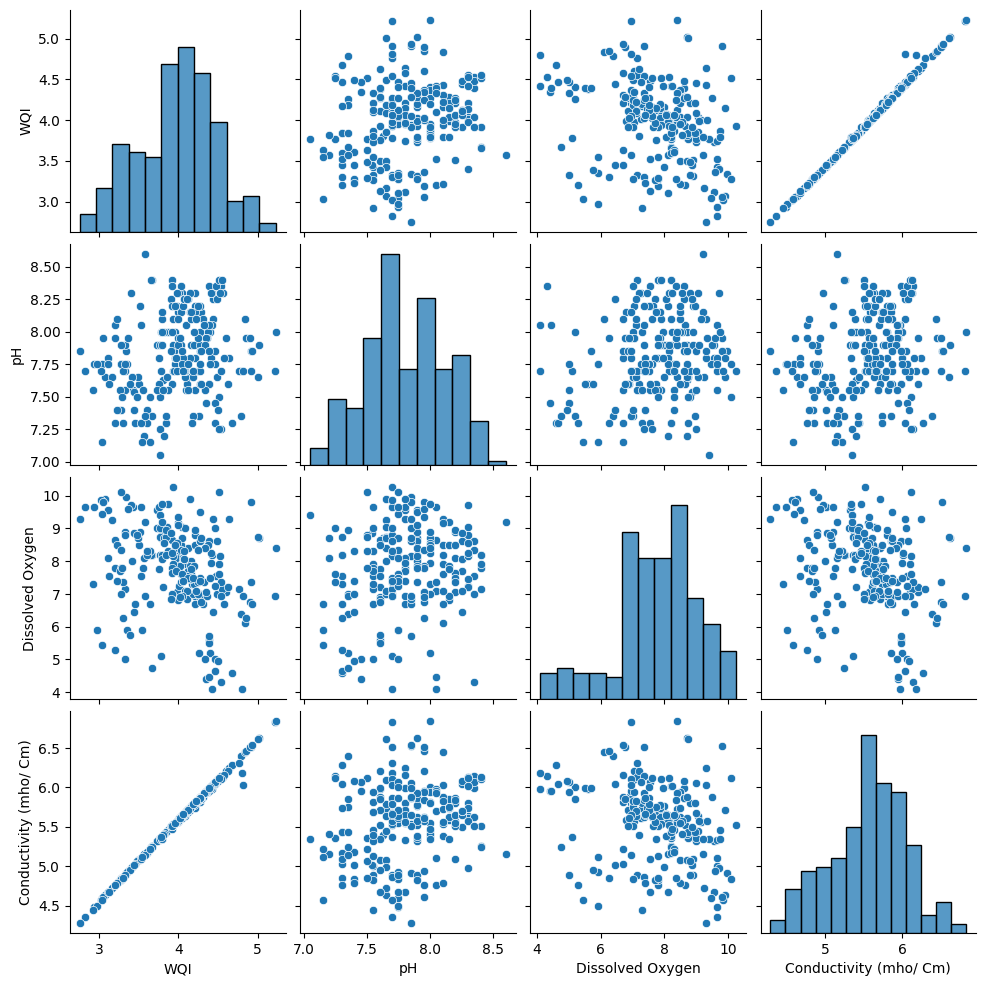

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for important features
sns.pairplot(df[['WQI','pH','Dissolved Oxygen','Conductivity (mho/ Cm)']])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((236, 9), (59, 9))

In [16]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_train_Scale=ss.fit_transform(X_train)
X_test_scale=ss.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=cv, scoring='r2',
    random_state=42, n_jobs=-1
)

random_search.fit(X_train_Scale, Y_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_scale)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R²:", r2_score(Y_test, y_pred))



RMSE: 41.619454640736635
R²: 0.9198855523842584


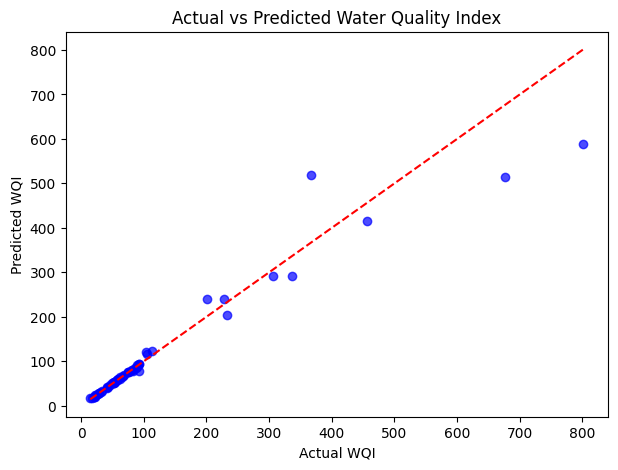

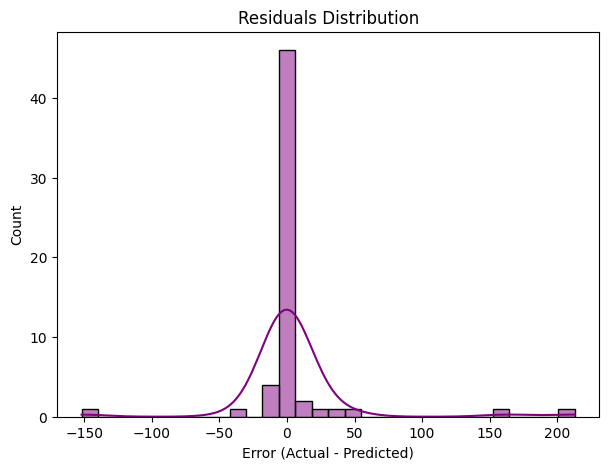

C:\Users\USER\AppData\Local\Temp\ipykernel_5844\1178006198.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


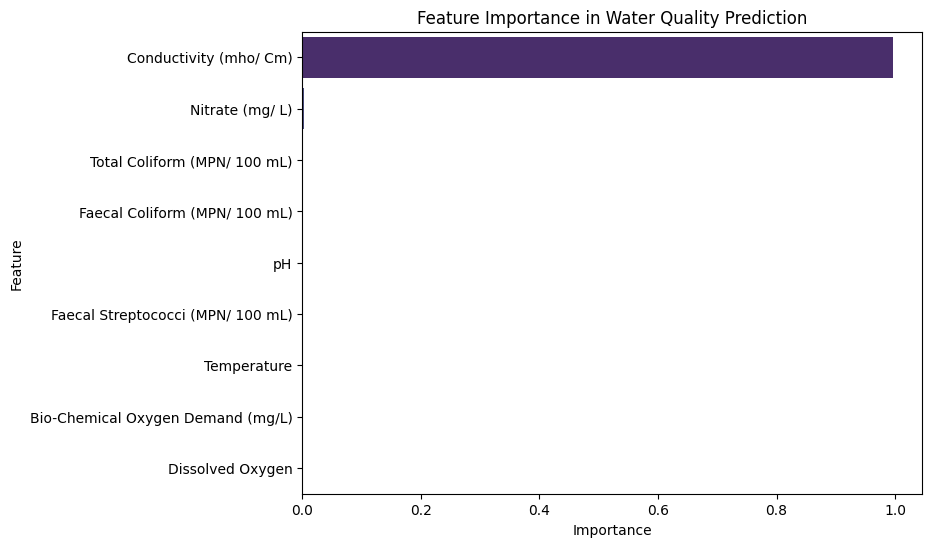

In [19]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(Y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual WQI")
plt.ylabel("Predicted WQI")
plt.title("Actual vs Predicted Water Quality Index")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # perfect fit line
plt.show()

# Residual plot
residuals = Y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.show()

# Feature importance
importances = best_model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance in Water Quality Prediction")
plt.show()

In [25]:
import numpy as np

# Function to classify WQI into categories
def classify_wqi(wqi):
    if wqi >= 90:
        return "Excellent"
    elif wqi >= 70:
        return "Good"
    elif wqi >= 50:
        return "Poor"
    elif wqi >= 25:
        return "Very Poor"
    else:
        return "Unsuitable for Drinking"

# Example feature names (replace with your dataset features order)
feature_names = ['Temperature', 'Dissolved Oxygen', 'pH',
       'Bio-Chemical Oxygen Demand (mg/L)',
       'Faecal Streptococci (MPN/ 100 mL)', 'Nitrate (mg/ L)',
       'Faecal Coliform (MPN/ 100 mL)', 'Total Coliform (MPN/ 100 mL)',
       'Conductivity (mho/ Cm)']

# Take user input
user_input = []
for feature in feature_names:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

# Convert to numpy array & reshape
user_array = np.array(user_input).reshape(1, -1)

# If you scaled data during training, scale here also
# Example: user_array = scaler.transform(user_array) 
# (Make sure you used StandardScaler or MinMaxScaler earlier)

# Prediction using best_model
predicted_wqi = best_model.predict(user_array)[0]

# Show result
print("\n✅ Predicted WQI:", round(predicted_wqi, 2))
print("✅ Water Quality Category:", classify_wqi(predicted_wqi))



✅ Predicted WQI: 1487.28
✅ Water Quality Category: Excellent
